In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
mean_01 = np.array([0.1, 0.2])
mean_02 = np.array([5.1, 5.2])

cov_01 = np.array([[1.0, 0.2],[0.2, 1.1]])
cov_02 = np.array([[1.0, 0.3],[0.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print (dist_01.shape)
print (dist_02.shape)

(500, 2)
(500, 2)


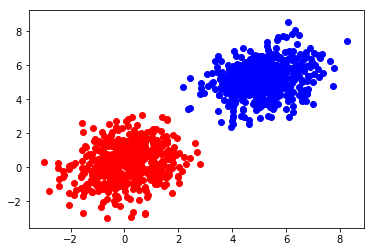

In [152]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='r')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='b')

plt.show()

In [160]:
## Total Dataset
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print (data.shape)

data[:dist_01.shape[0], :dist_01.shape[1]] = dist_01
data[dist_01.shape[0]: rows, :dist_01.shape[1]] = dist_02
data[dist_01.shape[0]: rows, -1] = 1.0

(1000, 3)


In [162]:
np.random.shuffle(data)

data[:10]

array([[ 7.71120766e-01, -2.74692033e+00,  0.00000000e+00],
       [ 3.84297872e+00,  3.62606900e+00,  1.00000000e+00],
       [ 4.78213052e+00,  4.70983599e+00,  1.00000000e+00],
       [ 9.01534713e-01, -7.59986404e-02,  0.00000000e+00],
       [ 1.17817560e-01,  5.66727567e-03,  0.00000000e+00],
       [ 3.11240024e-02,  9.10463148e-01,  0.00000000e+00],
       [ 5.34846992e+00,  3.98370969e+00,  1.00000000e+00],
       [ 5.07199292e+00,  4.40937539e+00,  1.00000000e+00],
       [ 6.87759041e+00,  6.00559147e+00,  1.00000000e+00],
       [ 3.38227264e-02, -1.11190689e+00,  0.00000000e+00]])

In [164]:
## Data Splitting
split = int(0.75*data.shape[0])
X_train = data[:split, :-1]
Y_train = data[:split, -1]

X_test = data[split:, :-1]
Y_test = data[split:, -1]

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [166]:
'''Functions'''
def sigmoid(z):
    sig = 1.0/(1 + np.exp(-1*z))
    return sig

def hypothesis(x_sample, w, b):
    h = (x_sample*w).sum() + b
    return sigmoid(h)
    
def get_error(x, w, y_true, b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 0:
            add_term = -1*(np.log(1 - hypothesis(x[ix], w, b)))
            err += add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix], w, b)))
            err += add_term
    
    err = err/m
    return err

In [168]:
def get_gradients(x, w, y_true, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [170]:
def optimizer(x, w, y_true, b, learning_rate=0.001):
    error = get_error(x, w, y_true, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b

In [172]:
def Logistic_Regression(X_train, Y_train, nb_epochs=200, learning_rate=0.0001):
    
    loss = []
    
    ## Parameter Initialisation
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [174]:
loss_logs, W_final, b_final = Logistic_Regression(X_train, Y_train)

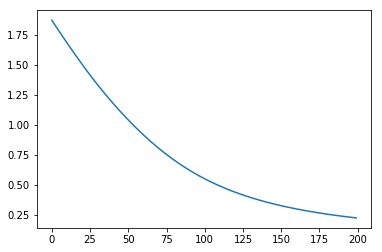

In [176]:
plt.plot(loss_logs)
plt.show()

In [178]:
print (W_final)
print (b_final)
print(X_test[0])

[0.67615448 0.17635247]
-0.98447686341862
[4.47975505 5.56129285]


In [180]:
def get_predict(test_point, W_final, b_final):
    pred = hypothesis(test_point, W_final, b_final)
    if pred >= 0.5:
        return 1
    else:
        return 0

In [182]:
print(get_predict(X_test[4], W_final, b_final))

1


In [184]:
def get_accuracy(X_test, Y_test, W_final, b_final ):
    m=X_test.shape[0]
    preds = []
    for i in range(m):
        predictions = get_predict(X_test[i], W_final, b_final)
        preds.append(predictions)
            
    return np.sum(np.array(preds)==Y_test)/X_test.shape[0]
        

In [186]:
print(get_accuracy(X_test, Y_test, W_final, b_final ))

0.952


In [188]:
def get_test_loss(X_test, Y_test):
    er = get_error(X_test, W_final,Y_test,b_final)
    return er

In [189]:
print(get_test_loss(X_test, Y_test))

0.20542979927350555
